In [1]:
import pandas as pd

'''
SECTION 1: CHECKING MISSING DATASET PARTS / SPLIT DATASET INTO TRAIN SETS (80%) AND TEST SETS (20%)
'''

# Load the Boston House Prices dataset
file_path = 'Boston_house_prices_dataset.csv' 
data = pd.read_csv(file_path)

# Check missing values
missing_values = data.isnull().sum()
print(missing_values)

# Data standardization
for column in data.columns:
    mean, std = data[column].mean(), data[column].std()
    data[column] = (data[column] - mean) / std


# Define the split ratio
split_ratio = 0.8  # 80% for training, 20% for testing

# Calculate the index to split the data
split_index = int(len(data) * split_ratio)

# Split the dataset into training and testing sets
train_data = data[:split_index] 
test_data = data[split_index:]   

# Separate features and target variables
X_train = train_data.drop(columns=['MEDV'])  # Features for training
y_train = train_data['MEDV']  # Target variable for training

X_test = test_data.drop(columns=['MEDV'])    # Features for testing
y_test = test_data['MEDV']    # Target variable for testing

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


Section 1 Markdown: There are no missing values in the dataset

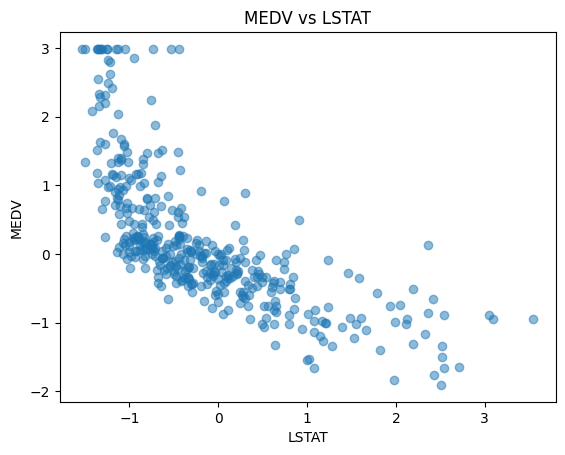

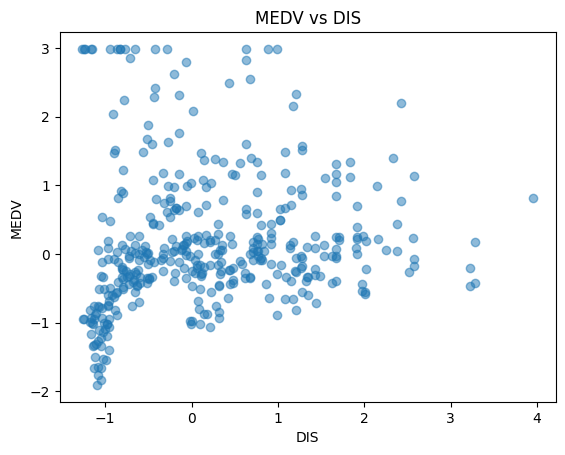

Correlation between MEDV and LSTAT: -0.7085913610070665
Correlation between MEDV and DIS: 0.12789292452509668


In [2]:
import matplotlib.pyplot as plt

'''
SECTION 2: PLOT 'MEDV' VS 'LSTAT' / PLOT 'MEDV' VS 'DIS'
'''

# Plot 'MEDV' vs 'LSTAT'
plt.scatter(X_train['LSTAT'], y_train, alpha=0.5)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('MEDV vs LSTAT')
plt.show()

# Plot 'MEDV' vs 'DIS'
plt.scatter(X_train['DIS'], y_train, alpha=0.5)
plt.xlabel('DIS')
plt.ylabel('MEDV')
plt.title('MEDV vs DIS')
plt.show()

# Correlation Coefficients
correlation_lstat = y_train.corr(X_train['LSTAT'])
correlation_dis = y_train.corr(X_train['DIS'])

print(f'Correlation between MEDV and LSTAT: {correlation_lstat}')
print(f'Correlation between MEDV and DIS: {correlation_dis}')

Section 2 Markdown: 

The correlation coefficient between 'MEDV' and 'LSTAT' is approximately -0.751, which indicates a strong negative correlation.
The correlation coefficient between 'MEDV' and 'DIS' is approximately 0.283, which indicates a weak positive correlation.

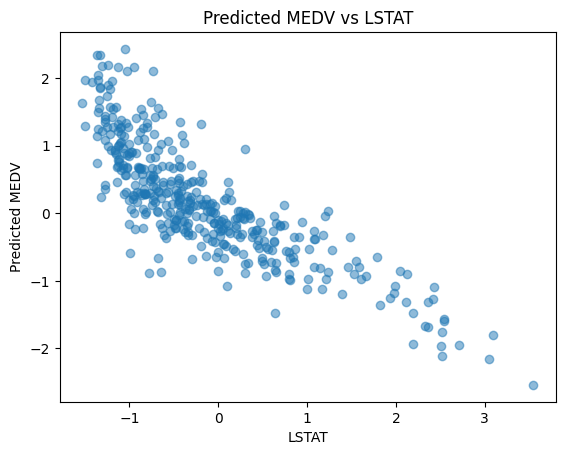

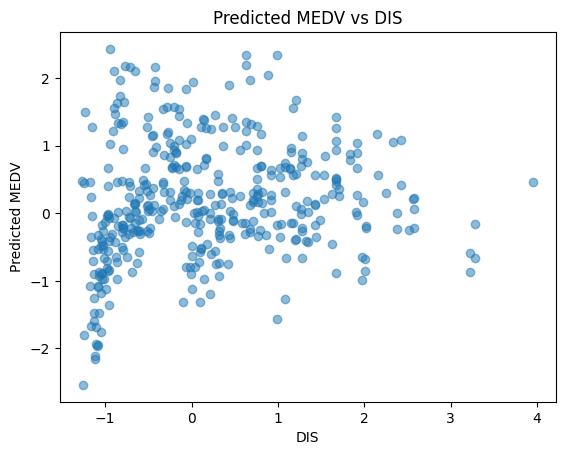

Correlation between MEDV and LSTAT: -0.8272182874121403
Correlation between MEDV and DIS: 0.14930377622360788


In [3]:
import numpy as np
'''
SECTION 3: FIND OPTIMAL WEIGHT USING CLOSED FORM OF LINEAR REGRESSION FOR LSE
'''
# Add a column of ones for the bias term
X_train_ones = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# Compute optimal weights using closed-form solution
weights = (np.linalg.inv(X_train_ones.T @ X_train_ones)) @ X_train_ones.T @ y_train

# Predict using the obtained weights
y_pred = X_train_ones @ weights

# Plot predicted values vs 'LSTAT'
plt.scatter(X_train['LSTAT'], y_pred, alpha=0.5)
plt.xlabel('LSTAT')
plt.ylabel('Predicted MEDV')
plt.title('Predicted MEDV vs LSTAT')
plt.show()

# Plot predicted values vs 'DIS'
plt.scatter(X_train['DIS'], y_pred, alpha=0.5)
plt.xlabel('DIS')
plt.ylabel('Predicted MEDV')
plt.title('Predicted MEDV vs DIS')
plt.show()

# Calculate correlation coefficients using np.corrcoef
correlation_lstat2 = np.corrcoef(y_pred, X_train['LSTAT'])[0, 1]
correlation_dis2 = np.corrcoef(y_pred, X_train['DIS'])[0, 1]

print(f'Correlation between MEDV and LSTAT: {correlation_lstat2}')
print(f'Correlation between MEDV and DIS: {correlation_dis2}')


Section 3 Markdown: 

The correlation coefficient between predicted values (y_pred) and 'LSTAT' is approximately -0.863, which indicates a strong negative correlation.
The correlation coefficient between predicted values (y_pred)  and 'DIS' is approximately 0.325, which indicates a weak positive correlation.

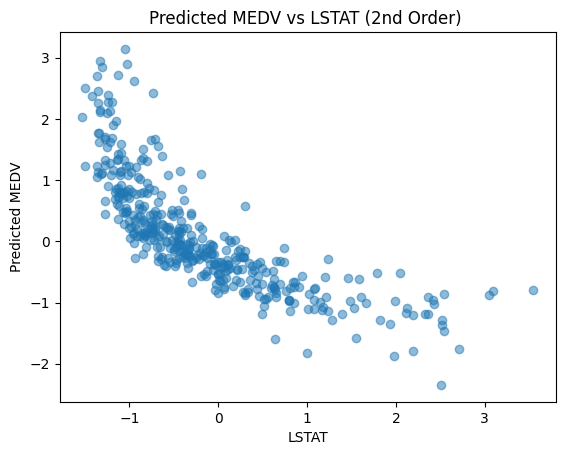

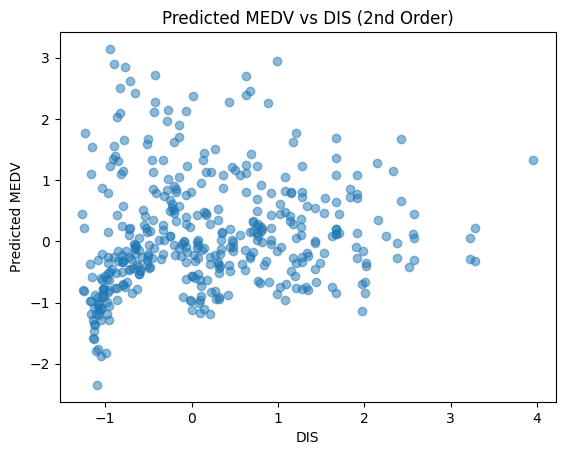

Correlation between MEDV (2nd order) and Normalized LSTAT^2: -0.4310921660079265
Correlation between MEDV (2nd order) and Normalized DIS^2: 0.16531804307229225


In [4]:
'''
SECTION 4: DOUBLE THE NUMBER OF FEATURES BY ADDING THE 2ND OF EACH FEATURE TO THE ORIGINAL
'''
# Square

X_train_2nd_order_normalized = np.c_[X_train, X_train**2]
X_test_2nd_order = np.c_[X_test, X_test**2]


# Compute optimal weights with the extended and normalized feature set
X_train_ones_2nd_order_normalized = np.c_[np.ones((X_train_2nd_order_normalized.shape[0], 1)), X_train_2nd_order_normalized]
weights_2nd_order = np.linalg.inv(X_train_ones_2nd_order_normalized.T @ X_train_ones_2nd_order_normalized) @ X_train_ones_2nd_order_normalized.T @ y_train

# Predict using the obtained weights
y_pred_2nd_order = X_train_ones_2nd_order_normalized @ weights_2nd_order

# Plot predicted values vs 'LSTAT'
plt.scatter(X_train['LSTAT'], y_pred_2nd_order, alpha=0.5)
plt.xlabel('LSTAT')
plt.ylabel('Predicted MEDV')
plt.title('Predicted MEDV vs LSTAT (2nd Order) ')
plt.show()

# Plot predicted values vs 'DIS'
plt.scatter(X_train['DIS'], y_pred_2nd_order, alpha=0.5)
plt.xlabel('DIS')
plt.ylabel('Predicted MEDV')
plt.title('Predicted MEDV vs DIS (2nd Order)')
plt.show()

# Calculate correlation coefficients using np.corrcoef
correlation_lstat3 = np.corrcoef(y_pred_2nd_order, X_train_2nd_order_normalized[:, 2])[0, 1]
correlation_dis3 = np.corrcoef(y_pred_2nd_order, X_train_2nd_order_normalized[:, 3])[0, 1]

print(f'Correlation between MEDV (2nd order) and Normalized LSTAT^2: {correlation_lstat3}')
print(f'Correlation between MEDV (2nd order) and Normalized DIS^2: {correlation_dis3}')



In [5]:
'''
SECTION 5: REPORT MSE LOSS ON TRAINING AND TESTING SETS FOR EACH SECTION
'''
## Calculate MSE for Section 3 (Original Features)

# MSE for training set
squared_diff_train = (y_train - y_pred) ** 2 # Calculate squared differences 
mse_train = np.mean(squared_diff_train) # Calculate MSE for the training set

# MSE for testing set
X_test_ones = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_pred_test = X_test_ones @ weights

squared_diff_test = (y_test - y_pred_test) ** 2 # Calculate squared differences for the test set
mse_test = np.mean(squared_diff_test) # Calculate MSE for the test set

print(f'MSE on training set (Original Features): {mse_train:.4f}')
print(f'MSE on test set (Original Features): {mse_test:.4f}')

## Calculate MSE for Section 4 (2nd Order Features)

# MSE for training set
squared_diff_train = (y_train - y_pred_2nd_order) ** 2 # Calculate squared differences 
mse_train_2nd_order = np.mean(squared_diff_train) # Calculate MSE for the training set

# MSE for testing set
X_test_2nd_order = np.c_[np.ones((X_test_2nd_order.shape[0])), X_test_2nd_order]
y_pred_test = X_test_2nd_order @ weights_2nd_order

squared_diff_test = (y_test - y_pred_test) ** 2 # Calculate squared differences for the test set
mse_test = np.mean(squared_diff_test) # Calculate MSE for the test set
squared_diff_test_2nd_order = (y_test - y_pred_test) ** 2 # Calculate squared differences for the test set
mse_test_2nd_order = np.mean(squared_diff_test_2nd_order) # Calculate MSE for the test set

print(f'MSE on training set (2nd Order Features): {mse_train_2nd_order:.4f}')
print(f'MSE on test set (2nd Order Features): {mse_test_2nd_order:.4f}')


MSE on training set (Original Features): 0.2693
MSE on test set (Original Features): 0.3878
MSE on training set (2nd Order Features): 0.1783
MSE on test set (2nd Order Features): 0.4248


Section 5 Markdown:

The model with 2nd-order features (MSE: 0.1783) performs better on the training set compared to the model with original features (MSE: 0.2693).

The model with 2nd-order features (MSE: 0.4248) performs worse on the test set compared to the model with original features (MSE: 0.3878).

This indicates that the model with 2nd-order features overfits, which could be seen on the MSE data calculation.

Conclusion:
In this instance, adding the 2nd order feature is not beneficial and cannot improved the model's predictive performance.